In [66]:
# Install python packages
# !pip install pandas

## First reading the Nasa Star Dataset

In [1]:
import pandas as pd
df=pd.read_csv('stars.csv') 
df.head(1000)


,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


### Task 1: prepare data for PCA (apply common scale if data is on different scales, center so the mean of the data stands in the origin);

#### Answer: here we see from output Color and Spectral_class column are string value, so next code I convert it to Numerical value.

In [3]:
#change color column to numerical value
output = []
for x in df['Color']:
    if x not in output:
        output.append(x)
print(output)

for i in range(len(output)):    
    df.loc[df["Color"] == output[i], "Color"] = i



#change Spectral_Class column to numerical value
    
output2 = []
for x in df['Spectral_Class']:
    if x not in output2:
        output2.append(x)
print(output2)


for i in range(len(output2)):
    df.loc[df["Spectral_Class"] == output2[i], "Spectral_Class"] = i



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
[0, 1, 2, 3, 4, 5, 6]


In [4]:
# Output of common scale data
df.head(5)

df.to_csv('new.txt', index=False)

### Task2: Standardize the Data
PCA is effected by scale so we need to scale the features in our data before applying PCA. I have Used StandardScaler to  standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms.
    

In [5]:
from sklearn.preprocessing import StandardScaler

features = ['Temperature', 'L', 'R', 'A_M', 'Color','Spectral_Class']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['Type']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
print('New Standardize the Data:')
x

New Standardize the Data:


array([[-0.7793821 , -0.59862356, -0.45920992,  1.11674535, -0.89201497,
        -0.84161277],
       [-0.78210961, -0.59862357, -0.45924053,  1.16241376, -0.89201497,
        -0.84161277],
       [-0.82847728, -0.59862357, -0.45934168,  1.36221308, -0.89201497,
        -0.84161277],
       ...,
       [-0.17502879,  2.40315735,  2.29779992, -1.43783157, -0.35546461,
         0.37885288],
       [-0.13243767,  1.66287782,  1.69517694, -1.48540283, -0.35546461,
         0.37885288],
       [ 2.87275403,  1.04834522,  2.99536993, -1.15906395,  0.7176361 ,
         1.59931852]])

### Task 3: compute the biplot of the two principal components, and explain covariances on it;

### Task4: detect outliers via the biplot and T2/SPEx control charts;

The original data has 7 columns ('Temperature', 'L', 'R', 'A_M', 'Color','Spectral_Class', and 'Type'). we have used 6 coulmn as a feature and  last column 'type' as a target. So for PCA dimension reduction I have used 6 column, the code projects the 6  dimensional into 2 dimensions. I should note that after dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.



In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC 1', 'PC 2'])
print('Output of 2D Principal component column:')
principalDf 

Output of 2D Principal component column:


,PC 1,PC 2
0,-1.949479,0.124416
1,-1.972514,0.111753
2,-2.087470,0.065524
3,-1.985250,0.117114
4,-2.178093,0.046076
...,...,...
235,4.083845,0.522189
236,4.816668,1.395620
237,2.313131,2.702339
238,1.867846,2.090986


In [46]:
finalDf = pd.concat([principalDf, df[['Type']]], axis = 1)
finalDf

,PC 1,PC 2,Type
0,-1.949479,0.124416,0
1,-1.972514,0.111753,0
2,-2.087470,0.065524,0
3,-1.985250,0.117114,0
4,-2.178093,0.046076,0
...,...,...,...
235,4.083845,0.522189,5
236,4.816668,1.395620,5
237,2.313131,2.702339,5
238,1.867846,2.090986,5


### Visualize 2D principal component
This section is just plotting 2 dimensional data. we can notice on the graph below that the classes seem well separated from each other.

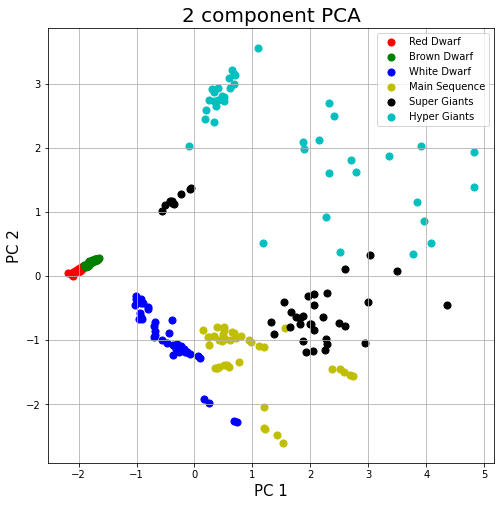

In [71]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1,2,3,4,5]
colors = ['r', 'g', 'b', 'y','k','c']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Type'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC 1']
               , finalDf.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(['Red Dwarf','Brown Dwarf', 'White Dwarf','Main Sequence','Super Giants','Hyper Giants'])
ax.grid()

In [73]:
pca.explained_variance_ratio_

array([0.50124146, 0.26253855])

### Explained Variance

The explained variance tells us how much information (variance) can be attributed to each of the principal components. This is important as while I  converted 6 dimensional space to 2 dimensional space, I might have lose some of the variance (information) when I did  this. By using the attribute explained_variance_ratio_, we can see that the first principal component contains 50.12% of the variance and the second principal component contains 26.25% of the variance. Together, the two components contain 76.37% of the information.

In [74]:
print(abs( pca.components_ ))

[[0.4119051  0.44196881 0.26295841 0.4796307  0.38206905 0.43569287]
 [0.26575444 0.32129928 0.62411979 0.29273166 0.46791153 0.36329439]]
